<a href="https://colab.research.google.com/github/harshachourey2/Diamond-Dynamics/blob/main/Diamond_Dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Diamond Dynamics: Price Prediction and Market
Segmentation

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost tensorflow


Upload & Load Dataset

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()   # diamonds.csv upload karo
df = pd.read_csv("diamonds.csv")

df.head()


Saving diamonds.csv to diamonds.csv


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
import pandas as pd

print("Shape:", df.shape)
df.info()


Shape: (53940, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.describe()


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Data Cleaning

(zero x,y,z → NaN → drop)

In [ ]:
import numpy as np

# Replace zero dimensions with NaN
df[["x","y","z"]] = df[["x","y","z"]].replace(0, np.nan)

# Drop missing values
df = df.dropna()

print("After cleaning shape:", df.shape)


After cleaning shape: (53920, 10)


Exploratory Data Analysis (EDA)

🔹 Price Distribution

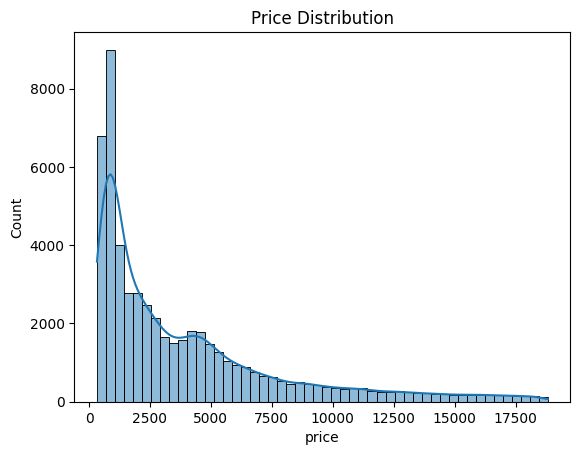

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["price"], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()


🔹 Carat Distribution

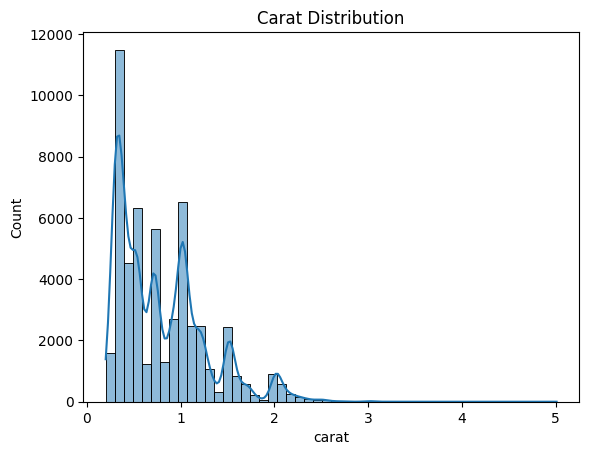

In [ ]:
sns.histplot(df["carat"], bins=50, kde=True)
plt.title("Carat Distribution")
plt.show()


🔹 Count Plot (Cut)

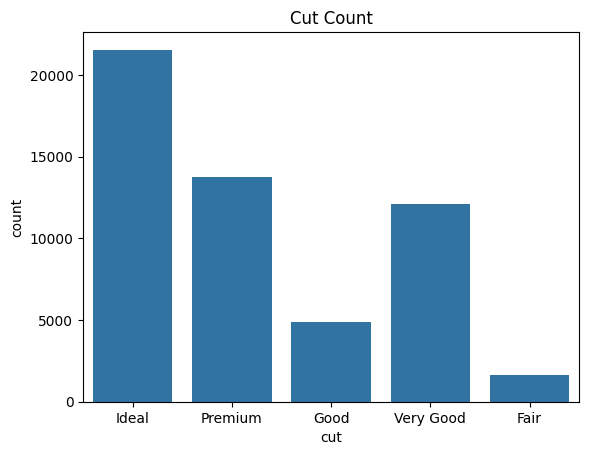

In [ ]:
sns.countplot(x="cut", data=df)
plt.title("Cut Count")
plt.show()


🔹 Correlation Heatmap

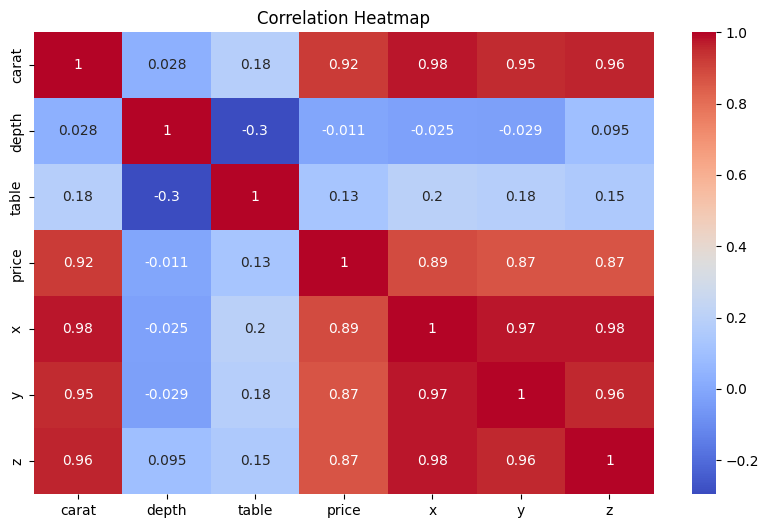

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Feature Engineering

In [ ]:
USD_TO_INR = 83   # fixed conversion rate

# Convert price to INR
df["price_inr"] = df["price"] * USD_TO_INR

# New engineered features
df["volume"] = df["x"] * df["y"] * df["z"]
df["price_per_carat"] = df["price"] / df["carat"]
df["dimension_ratio"] = (df["x"] + df["y"]) / (2 * df["z"])

df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,price_inr,volume,price_per_carat,dimension_ratio
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,27058,38.202030,1417.391304,1.631687
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,27058,34.505856,1552.380952,1.673160
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,27141,38.076885,1421.739130,1.757576
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,27722,46.724580,1151.724138,1.602662
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,27805,51.917250,1080.645161,1.580000


Encoding Categorical Features

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

cat_cols = ["cut","color","clarity"]

encoder = OrdinalEncoder()
df[cat_cols] = encoder.fit_transform(df[cat_cols])

df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,price_inr,volume,price_per_carat,dimension_ratio
0,0.23,2.0,1.0,3.0,61.5,55.0,326,3.95,3.98,2.43,27058,38.202030,1417.391304,1.631687
1,0.21,3.0,1.0,2.0,59.8,61.0,326,3.89,3.84,2.31,27058,34.505856,1552.380952,1.673160
2,0.23,1.0,1.0,4.0,56.9,65.0,327,4.05,4.07,2.31,27141,38.076885,1421.739130,1.757576
3,0.29,3.0,5.0,5.0,62.4,58.0,334,4.20,4.23,2.63,27722,46.724580,1151.724138,1.602662
4,0.31,1.0,6.0,3.0,63.3,58.0,335,4.34,4.35,2.75,27805,51.917250,1080.645161,1.580000


Train–Test Split (Regression)

In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(["price","price_inr"], axis=1)
y = df["price_inr"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)


(43136, 12) (10784, 12)


Regression Models
(Linear + Random Forest)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=150, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    print(f"\n{name}")
    print("MAE :", mae)
    print("RMSE:", rmse)
    print("R2  :", r2)



Linear Regression
MAE : 30846.44852764151
RMSE: 66485.75663969206
R2  : 0.9599765360491096

Random Forest
MAE : 1437.338646142434
RMSE: 9093.231367593286
R2  : 0.9992513239767686


Save Best Regression Model

In [ ]:
import pickle

best_model = models["Random Forest"]

pickle.dump(best_model, open("price_model.pkl", "wb"))

print("✅ Price prediction model saved!")


✅ Price prediction model saved!


Clustering (Market Segmentation)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Drop price columns for clustering
cluster_df = df.drop(["price","price_inr"], axis=1)

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_df)

# KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(scaled_features)

df[["carat","price_inr","cluster"]].head()


,carat,price_inr,cluster
0,0.23,27058,1
1,0.21,27058,1
2,0.23,27141,1
3,0.29,27722,1
4,0.31,27805,1


Cluster Analysis

In [ ]:
cluster_summary = df.groupby("cluster")[["carat","price_inr","volume"]].mean()
cluster_summary


,carat,price_inr,volume
cluster,,,
0,1.657841,966219.394549,269.501018
1,0.401284,87587.263655,65.929916
2,0.939471,365235.847006,152.468438


Save Clustering Model + Preprocessors

In [ ]:
pickle.dump(kmeans, open("cluster_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(encoder, open("encoder.pkl", "wb"))

print("✅ Clustering model + scaler + encoder saved!")


✅ Clustering model + scaler + encoder saved!


Final Check

In [ ]:
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,price_inr,volume,price_per_carat,dimension_ratio,cluster
0,0.23,2.0,1.0,3.0,61.5,55.0,326,3.95,3.98,2.43,27058,38.202030,1417.391304,1.631687,1
1,0.21,3.0,1.0,2.0,59.8,61.0,326,3.89,3.84,2.31,27058,34.505856,1552.380952,1.673160,1
2,0.23,1.0,1.0,4.0,56.9,65.0,327,4.05,4.07,2.31,27141,38.076885,1421.739130,1.757576,1
3,0.29,3.0,5.0,5.0,62.4,58.0,334,4.20,4.23,2.63,27722,46.724580,1151.724138,1.602662,1
4,0.31,1.0,6.0,3.0,63.3,58.0,335,4.34,4.35,2.75,27805,51.917250,1080.645161,1.580000,1


Prepare Data for ANN

In [ ]:
from sklearn.preprocessing import StandardScaler

# Features and target (same as regression)
X = df.drop(["price","price_inr"], axis=1)
y = df["price_inr"]

# Train-test split (reuse logic)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler_ann = StandardScaler()
X_train_scaled = scaler_ann.fit_transform(X_train)
X_test_scaled  = scaler_ann.transform(X_test)

print(X_train_scaled.shape, X_test_scaled.shape)


(43136, 13) (10784, 13)


Build ANN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define ANN architecture
ann_model = Sequential()
ann_model.add(Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)))
ann_model.add(Dense(32, activation="relu"))
ann_model.add(Dense(1))   # output layer (price)

# Compile model
ann_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mae"]
)

ann_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

Train ANN Model

In [ ]:
history = ann_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=64,
    verbose=1
)


Epoch 1/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 214821699584.0000 - mae: 324719.1875 - val_loss: 211330023424.0000 - val_mae: 323109.4062
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 201015394304.0000 - mae: 315258.0312 - val_loss: 170491101184.0000 - val_mae: 293224.6250
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 150660890624.0000 - mae: 277184.5625 - val_loss: 101627240448.0000 - val_mae: 230738.2344
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 84687020032.0000 - mae: 211203.4688 - val_loss: 47246548992.0000 - val_mae: 154748.7656
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 35817984000.0000 - mae: 138083.5469 - val_loss: 27363000320.0000 - val_mae: 109372.7109
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19753005056.0000 - mae: 102390.5547 - val_loss: 21855752192.0000 - val_mae: 91674.3281
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14212072448.0000 - mae: 87954.1094 - val_loss: 

Evaluate ANN Mod

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test data
ann_preds = ann_model.predict(X_test_scaled).flatten()

mae  = mean_absolute_error(y_test, ann_preds)
rmse = np.sqrt(mean_squared_error(y_test, ann_preds))
r2   = r2_score(y_test, ann_preds)

print("📊 ANN Model Performance")
print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)


337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step
📊 ANN Model Performance
MAE : 26946.498046875
RMSE: 49737.36333984744
R2  : 0.9776012897491455


Compare ANN with ML Models

In [ ]:
from sklearn.metrics import r2_score
import pickle

print("\n📊 Model Comparison (ML vs ANN)")

# ---- Ensure same features as training (drop cluster if exists) ----
if "cluster" in X_test.columns:
    X_test_rf = X_test.drop("cluster", axis=1)
else:
    X_test_rf = X_test.copy()

# ---- Load Random Forest model safely ----
try:
    rf_model = best_model
except NameError:
    rf_model = pickle.load(open("price_model.pkl", "rb"))

# RF Predictions & R2
rf_preds = rf_model.predict(X_test_rf)
rf_r2 = r2_score(y_test, rf_preds)

# ---- ANN Predictions & R2 ----
ann_preds = ann_model.predict(X_test_scaled).flatten()
ann_r2 = r2_score(y_test, ann_preds)

print("Random Forest R2:", rf_r2)
print("ANN R2          :", ann_r2)



📊 Model Comparison (ML vs ANN)
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step
Random Forest R2: 0.9992513239767686
ANN R2          : 0.9776012897491455


Save ANN Model + Scaler ✅

In [ ]:
# STEP 19: Save ANN model and its scaler

import pickle

# Save trained ANN model
ann_model.save("ann_price_model.h5")

# Save ANN feature scaler
pickle.dump(scaler_ann, open("scaler_ann.pkl", "wb"))

print("✅ ANN model + scaler saved successfully!")


✅ ANN model + scaler saved successfully!


Plot ANN Training History

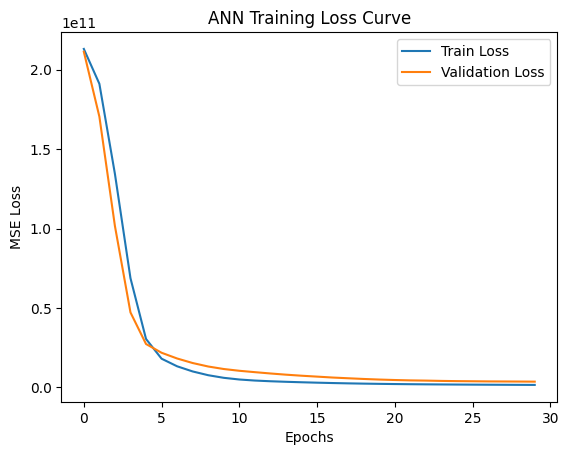

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("ANN Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()


Analyze Clusters (For Naming)

In [ ]:
# Cluster-wise summary statistics
cluster_profile = df.groupby("cluster").agg({
    "carat": "mean",
    "price_inr": "mean",
    "volume": "mean",
    "cut": "mean"
}).reset_index()

cluster_profile


,cluster,carat,price_inr,volume,cut
0,0,1.657841,966219.394549,269.501018,2.619702
1,1,0.401284,87587.263655,65.929916,2.529360
2,2,0.939471,365235.847006,152.468438,2.555798


Define Human-Readable Cluster Names

In [ ]:
# Manually map cluster numbers to names (based on above analysis)
cluster_name_map = {
    0: "Affordable Small Diamonds",
    1: "Mid-range Balanced Diamonds",
    2: "Premium Heavy Diamonds"
}

# Create new column with names
df["cluster_name"] = df["cluster"].map(cluster_name_map)

df[["cluster", "cluster_name"]].head()


,cluster,cluster_name
0,1,Mid-range Balanced Diamonds
1,1,Mid-range Balanced Diamonds
2,1,Mid-range Balanced Diamonds
3,1,Mid-range Balanced Diamonds
4,1,Mid-range Balanced Diamonds


Validate Cluster Naming

In [ ]:
# Check average price & carat per named cluster
df.groupby("cluster_name")[["carat","price_inr","volume"]].mean()


,carat,price_inr,volume
cluster_name,,,
Affordable Small Diamonds,1.657841,966219.394549,269.501018
Mid-range Balanced Diamonds,0.401284,87587.263655,65.929916
Premium Heavy Diamonds,0.939471,365235.847006,152.468438


In [ ]:
import pickle

pickle.dump(cluster_name_map, open("cluster_name_map.pkl", "wb"))

print("✅ Cluster name mapping saved!")


✅ Cluster name mapping saved!


In [ ]:
!pip install streamlit pandas scikit-learn numpy
!cd diamond_app
!streamlit run app.py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 115.8 MB/s eta 0:00:00
/bin/bash: line 1: cd: diamond_app: No such file or directory
Usage: streamlit run [OPTIONS] [TARGET] [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [ ]:
!pip install --upgrade pip
!pip install streamlit pandas scikit-learn numpy

In [37]:
!pip install pyngrok
from pyngrok import ngrok
ngrok.kill()
ngrok.set_auth_token("368liuocCKZG1vR7GmCld7eLRCa_6dLMc5qBt6FpXrKgdH3ff")
public_url = ngrok.connect(8501)
print(public_url)
!streamlit run app.py --server.port 8501 --server.address 0.0.0.0 &>/dev/null&

NgrokTunnel: "https://heedfully-brickish-stormy.ngrok-free.dev" -> "http://localhost:8501"


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
mkdir /content/drive/MyDrive/DiamondDynamics

In [42]:
# content → drive → MyDrive → Diamond Dynamics